In [16]:
from sklearn.datasets import make_classification
import numpy as np

In [17]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)
X
print()
Y

array([[ 1.59436569,  1.03078626,  0.30247354, ..., -0.08356359,
        -1.40923452,  0.2082834 ],
       [ 2.72008521, -1.26597863,  0.1496603 , ..., -0.03745744,
        -1.6137839 ,  0.6058313 ],
       [ 0.29445741, -1.26003514,  0.72045153, ...,  0.33355469,
        -0.52376657, -1.67792021],
       ...,
       [-0.83451804, -1.20244172,  0.16179069, ..., -0.00727976,
         0.67287047,  0.40137441],
       [ 1.3447604 , -1.22572926, -0.01121416, ..., -0.02889942,
        -0.8314924 ,  0.54125692],
       [ 0.43037416, -1.25893395,  1.42065476, ..., -0.02167157,
        -0.95199168,  0.50664777]])

array([1, 0, 0, ..., 0, 0, 0])

In [18]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [22]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [23]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [24]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

In [26]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [27]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.870
Naive Bayes: AUROC = 0.993


In [28]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

In [29]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ROC Plot')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

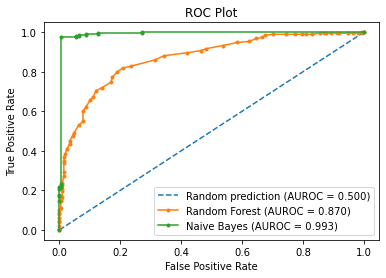

In [30]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()